# Part I: Data Preparation

## Read data from csv

In [1]:
import os 
import tarfile
from six.moves import urllib
import numpy as np

DATA_DIR = 'data'
CSV_FILE = DATA_DIR + '/Appt_NoShow.csv'


In [2]:
import pandas as pd

def load_housing_data(housing_path=DATA_DIR):
    csv_path = os.path.join(housing_path, "Appt_NoShow.csv")
    return pd.read_csv(csv_path)

In [3]:
Appt_NoShow = load_housing_data()
Appt_NoShow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [4]:
Appt_NoShow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
Appt_NoShow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df
Appt_NoShow.rename(columns = {'Handcap': 'Handicap', 'Neighbourhood': 'Hospital_Loc', 'PatientId': 'PatientID', 'No-show': 'Noshow'}, inplace  = True)
print(Appt_NoShow.columns)

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Hospital_Loc', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Noshow'],
      dtype='object')


In [7]:
Appt_NoShow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Loc,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
Appt_NoShow.AppointmentDay = Appt_NoShow.AppointmentDay.apply(np.datetime64)
Appt_NoShow.ScheduledDay = Appt_NoShow.ScheduledDay.apply(np.datetime64)
print(Appt_NoShow.AppointmentDay.head())
print(Appt_NoShow.ScheduledDay.head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]
0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


In [9]:
Appt_NoShow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Loc,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
print('Age:',sorted(Appt_NoShow.Age.unique()))
print('Gender:',Appt_NoShow.Gender.unique())
print('Diabetes:',Appt_NoShow.Diabetes.unique())
print('Alcoholism:',Appt_NoShow.Alcoholism.unique())
print('Hipertension:',Appt_NoShow.Hipertension.unique())
print('Handicap:',Appt_NoShow.Handicap.unique())
print('AppointmentID:',Appt_NoShow.AppointmentID.unique())
print('Scholarship:',Appt_NoShow.Scholarship.unique())
print('SMS_received:',Appt_NoShow.SMS_received.unique())
print('Hospital_Loc:', Appt_NoShow.Hospital_Loc.unique())
print('PatientID:', Appt_NoShow.PatientID.unique())
print('ScheduledDay:', Appt_NoShow.ScheduledDay.unique())




Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hipertension: [1 0]
Handicap: [0 1 2 3 4]
AppointmentID: [5642903 5642503 5642549 ..., 5630692 5630323 5629448]
Scholarship: [0 1]
SMS_received: [0 1]
Hospital_Loc: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO'

In [11]:
Appt_NoShow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Loc,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Remove negative ages
Appt_NoShow = Appt_NoShow[(Appt_NoShow.Age >= 0) & (Appt_NoShow.Age <= 100)]

In [13]:
Appt_NoShow.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Hospital_Loc,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [14]:
PROCESSED_DATA_DIR = 'processed_data'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example
import numpy as np

d = {'Yes' : True, 'No' : False}
Appt_NoShow['Noshow'] = Appt_NoShow['Noshow'].map(d)
Appt_NoShow['noshows_cat'] = np.ceil(Appt_NoShow['Noshow'] / 2)
Appt_NoShow['noshows_cat'].where(Appt_NoShow["noshows_cat"] < 1, 1.0, inplace=True)
Appt_NoShow['noshows_cat']
Appt_NoShow["noshows_cat"].value_counts() / len(Appt_NoShow)





0.0    0.79808
1.0    0.20192
Name: noshows_cat, dtype: float64

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
for train_index, test_index in split.split(Appt_NoShow, Appt_NoShow["noshows_cat"]):
    train_set = Appt_NoShow.loc[train_index]
    test_set = Appt_NoShow.loc[test_index]
    
train_set["noshows_cat"].value_counts() / len(train_set)

0.0    0.797681
1.0    0.202262
Name: noshows_cat, dtype: float64

In [16]:
test_set["noshows_cat"].value_counts() / len(test_set)

0.0    0.799312
1.0    0.200552
Name: noshows_cat, dtype: float64

In [17]:
for set in (train_set, test_set):
    set.drop(["noshows_cat"], axis=1, inplace=True)

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

In [18]:
Appt_NoShow = train_set.copy()

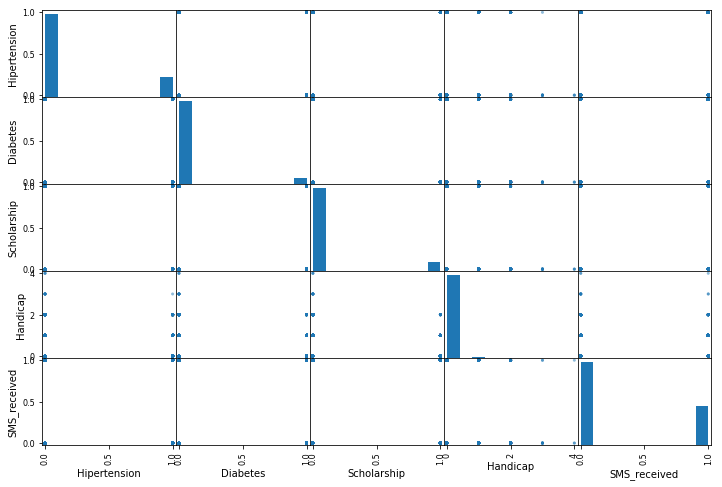

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["Noshow", "Hipertension", "Diabetes", "Scholarship", "Handicap", "SMS_received"]
scatter_matrix(Appt_NoShow[attributes], figsize=(12, 8))
plt.show()

In [20]:
Appt_NoShow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88415 entries, 43227 to 74204
Data columns (total 14 columns):
PatientID         88410 non-null float64
AppointmentID     88410 non-null float64
Gender            88410 non-null object
ScheduledDay      88410 non-null datetime64[ns]
AppointmentDay    88410 non-null datetime64[ns]
Age               88410 non-null float64
Hospital_Loc      88410 non-null object
Scholarship       88410 non-null float64
Hipertension      88410 non-null float64
Diabetes          88410 non-null float64
Alcoholism        88410 non-null float64
Handicap          88410 non-null float64
SMS_received      88410 non-null float64
Noshow            88410 non-null object
dtypes: datetime64[ns](2), float64(9), object(3)
memory usage: 10.1+ MB


## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, StandardScaler, LabelBinarizer

cat_attributes = ['Hospital_Loc', 'Gender', 'Noshow']
num_attributes = [x for x in list(Appt_NoShow) if x not in cat_attributes]

# This is used to select columns from a pandas DataFrame 
# Needed since sklearn does not have builtin support for pandas
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values
    
# This transformer adds the normalized attributes we looked at above

    
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', NormalizedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('label_binarizer', LabelBinarizer())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

NameError: name 'NormalizedAttributesAdder' is not defined